<a href="https://colab.research.google.com/github/IanTirok/Climate-change-tweets-analysis/blob/main/Climate_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question


## Importing the libraries

In [61]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from spacy.lang.en import English
nlp = English()
import spacy
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
#for text pre-processing
import re, string

## Importing the Dataset


In [63]:
#load dataset
climate_df = pd.read_csv('/content/drive/MyDrive/Module 2 groupwork Datasets/Classified data.csv')

In [64]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    text = re.sub("@\S+", "", text)
    re.sub("\$", "", text)
    text = re.sub("https", "", text)
    text = re.sub("co", "", text)
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    re.sub("#", "", text)
    
    return text


#tokenizer, pos tagging and entity recognition

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)



In [65]:
climate_df.head()

,Unnamed: 0,id,user,tweet,location,created_at,retweet_count,class
0,4,1427542334963605511,nuceraleo,@WIRED Climate change is increasing the appear...,"Naples, Italy",2021-08-17 08:06:29,0,famine
1,5,1427540945260720136,EmiratesNBD_AE,We are excited to join the #PricelessPlanet Co...,United Arab Emirates,2021-08-17 08:00:58,0,greentalk
2,15,1427533126084014087,COADKENYA,CLIMATE CHANGE negatively IMPACTS agricultural...,"Iten, Kenya",2021-08-17 07:29:54,6,drought
3,16,1427531810662199313,ForumClimatique,#1 We are not doing enough\nNot even close\nLe...,Africa,2021-08-17 07:24:40,1,greentalk
4,18,1427526452623208453,Dasr,California doesn't need conservative propagand...,Pacific North West,2021-08-17 07:03:23,0,water


In [66]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
#climate_df['clean_text'] = climate_df['tweet'].apply(lambda x: finalpreprocess(x))
#climate_df = climate_df.drop(['tweet'], axis= 1)


# fen = 'There, well are again?'
# lk = 'here we are again brother'
# hj = 'here lwe are again'
# ten = pd.DataFrame( columns=['text'])
# #ten['text']

# ten = ten.append({'text':fen}, ignore_index=True)
# ten = ten.append({'text':hj}, ignore_index=True)
# # ten['text'] = ten['text'].apply(lambda x: finalpreprocess(x))
# # ten
# finalpreprocess(lk)


In [67]:
# remove url from our data
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

climate_df['clean_text']=climate_df['tweet'].apply(lambda x : remove_URL(x))

In [68]:
# Replace classes that are related
climate_df["class"].replace({"famine": "drought", "water": "floods"}, inplace=True)

In [69]:
#Preview top of our dataset head
climate_df.head()

,Unnamed: 0,id,user,tweet,location,created_at,retweet_count,class,clean_text
0,4,1427542334963605511,nuceraleo,@WIRED Climate change is increasing the appear...,"Naples, Italy",2021-08-17 08:06:29,0,drought,@WIRED Climate change is increasing the appear...
1,5,1427540945260720136,EmiratesNBD_AE,We are excited to join the #PricelessPlanet Co...,United Arab Emirates,2021-08-17 08:00:58,0,greentalk,We are excited to join the #PricelessPlanet Co...
2,15,1427533126084014087,COADKENYA,CLIMATE CHANGE negatively IMPACTS agricultural...,"Iten, Kenya",2021-08-17 07:29:54,6,drought,CLIMATE CHANGE negatively IMPACTS agricultural...
3,16,1427531810662199313,ForumClimatique,#1 We are not doing enough\nNot even close\nLe...,Africa,2021-08-17 07:24:40,1,greentalk,#1 We are not doing enough\nNot even close\nLe...
4,18,1427526452623208453,Dasr,California doesn't need conservative propagand...,Pacific North West,2021-08-17 07:03:23,0,floods,California doesn't need conservative propagand...


In [70]:
#Preview the bottom of our dataset.
climate_df.tail()

,Unnamed: 0,id,user,tweet,location,created_at,retweet_count,class,clean_text
5599,8138,1424662585547403268,MehariTef,"""Hundreds of thousands face famine conditions ...",Ethiopia,2021-08-09 09:23:24,1,drought,"""Hundreds of thousands face famine conditions ..."
5600,8139,1424654783017783297,RewinaGebregzi1,@martinplaut Tigray people is suffering throug...,Afar,2021-08-09 08:52:23,3,drought,@martinplaut Tigray people is suffering throug...
5601,8140,1424650848987136003,TC_Africa,“There’s famine now in Tigray.” That 10 June 2...,"Johannesburg, South Africa",2021-08-09 08:36:45,54,drought,“There’s famine now in Tigray.” That 10 June 2...
5602,8141,1424641205820817410,Richard_pa,@MHHBJA2005 @GlasgowBhoy @Seebtree2 @IsraelMFA...,Islamic Republic of Iran,2021-08-09 07:58:26,0,drought,@MHHBJA2005 @GlasgowBhoy @Seebtree2 @IsraelMFA...
5603,8142,1424636519906750466,LpoOxvo,@martinplaut I think u r bullshit!!what abou...,Ethiopia,2021-08-09 07:39:49,0,drought,@martinplaut I think u r bullshit!!what abou...


In [71]:
#Shape of our datasets
climate_df.shape

(5604, 9)

In [72]:
#Drop the unrequired 'Unnamed: 0' column
climate_df.drop(['Unnamed: 0','user'],axis=1,inplace=True)


In [73]:
#change create at to date time 
import datetime
climate_df['created_at'] = pd.to_datetime(climate_df['created_at'])

climate_df['date'] = pd.to_datetime(climate_df['created_at'],format="%Y-%m-%d %H:%M:%S")
climate_df['year'] = pd.DatetimeIndex(climate_df['created_at']).year
climate_df['month'] = pd.DatetimeIndex(climate_df['created_at']).month
climate_df['hour'] = pd.DatetimeIndex(climate_df['created_at']).hour
climate_df['minute'] = pd.DatetimeIndex(climate_df['created_at']).minute


In [74]:
#checking column types
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5604 non-null   int64         
 1   tweet          5604 non-null   object        
 2   location       5556 non-null   object        
 3   created_at     5604 non-null   datetime64[ns]
 4   retweet_count  5604 non-null   int64         
 5   class          5604 non-null   object        
 6   clean_text     5604 non-null   object        
 7   date           5604 non-null   datetime64[ns]
 8   year           5604 non-null   int64         
 9   month          5604 non-null   int64         
 10  hour           5604 non-null   int64         
 11  minute         5604 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 525.5+ KB


In [75]:
#Dataset descriptive statistics
climate_df.describe()

,id,retweet_count,year,month,hour,minute
count,5.604000e+03,5604.000000,5604.0,5604.0,5604.000000,5604.000000
mean,1.426007e+18,3.887580,2021.0,8.0,12.313883,26.602427
std,8.563206e+14,86.034888,0.0,0.0,5.908501,17.729421
min,1.424493e+18,0.000000,2021.0,8.0,0.000000,0.000000
25%,1.425242e+18,0.000000,2021.0,8.0,8.000000,9.000000
50%,1.425924e+18,0.000000,2021.0,8.0,12.000000,26.000000
75%,1.426764e+18,1.000000,2021.0,8.0,17.000000,42.000000
max,1.427556e+18,5666.000000,2021.0,8.0,23.000000,59.000000


In [76]:
#checking for nulls
climate_df.isnull().sum()

id                0
tweet             0
location         48
created_at        0
retweet_count     0
class             0
clean_text        0
date              0
year              0
month             0
hour              0
minute            0
dtype: int64

In [77]:
#Lets extract only records where location is not null
climate_df = climate_df[climate_df['location'].notna()]


In [78]:
#checking for nulls
climate_df.isnull().sum()

id               0
tweet            0
location         0
created_at       0
retweet_count    0
class            0
clean_text       0
date             0
year             0
month            0
hour             0
minute           0
dtype: int64

In [79]:
#Recheck number of records
climate_df.shape

(5556, 12)

In [80]:
# check duplicates
climate_df.duplicated().sum()

130

In [81]:
# drop the duplicates
climate_df = climate_df.drop_duplicates()

#Recheck duplicates
climate_df.duplicated().sum()


0

In [82]:
# Recheck the shape of the dataset
climate_df.shape

(5426, 12)

In [83]:
#Renaming some of the classes
climate_df["class"].replace({"water": "floods", "famine": "drought"}, inplace=True)

In [84]:
climate_df.to_csv('Clean classified data_kwisha.csv')

# Exploratory Data Analysis

####Measures of central tendancy


In [85]:
#getting summary
climate_df.describe(include='all')

,id,tweet,location,created_at,retweet_count,class,clean_text,date,year,month,hour,minute
count,5.426000e+03,5426,5426,5426,5426.000000,5426,5426,5426,5426.0,5426.0,5426.000000,5426.000000
unique,NaN,5305,1156,5297,NaN,6,4753,5297,NaN,NaN,NaN,NaN
top,NaN,"Provide the harvest, in drought and shortage",Virginia,2021-08-09 18:49:27,NaN,renewable,"Western media ignores #Amhara, and #Afar! Its ...",2021-08-09 18:49:27,NaN,NaN,NaN,NaN
freq,NaN,14,362,3,NaN,2174,177,3,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2021-08-08 22:10:09,NaN,NaN,NaN,2021-08-08 22:10:09,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-08-17 09:00:30,NaN,NaN,NaN,2021-08-17 09:00:30,NaN,NaN,NaN,NaN
mean,1.426009e+18,NaN,NaN,NaN,3.976041,NaN,NaN,NaN,2021.0,8.0,12.314781,26.482676
std,8.561944e+14,NaN,NaN,NaN,87.430620,NaN,NaN,NaN,0.0,0.0,5.909585,17.716669
min,1.424493e+18,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2021.0,8.0,0.000000,0.000000
25%,1.425247e+18,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2021.0,8.0,8.000000,9.000000


What is the most appearing number in each column?

In [86]:
climate_df.columns

Index(['id', 'tweet', 'location', 'created_at', 'retweet_count', 'class',
       'clean_text', 'date', 'year', 'month', 'hour', 'minute'],
      dtype='object')

In [87]:
# Mode
# Calculating mode across different columns

a = climate_df[['id', 'location', 'created_at', 'retweet_count', 'class', 'clean_text',
       'date', 'year', 'month', 'hour', 'minute']].mode().head(1)

arr = a.to_numpy()
arr


array([[1.4248050388834263e+18, 'Virginia',
        Timestamp('2021-08-09 18:49:27'), 0.0, 'renewable',
        'Western media ignores #Amhara, and #Afar! Its focus is on giving life to #TPLFisaTerroristGroup! Their favorite lin… ',
        Timestamp('2021-08-09 18:49:27'), 2021.0, 8.0, 12.0, 6.0]],
      dtype=object)

In [88]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['id', 'location', 'created_at', 'retweet_count', 'class', 'clean_text',
       'date', 'year', 'month', 'hour', 'minute'], 
       'The most appearing record': [1424771092334452737, 'Ethiopia',
        '2021-08-14 17:17:44' , 0.0, 'drought',
        'provide harvest drought shortage',
        '2021-08-14 17:17:44', 2021.0, 8.0, 19.0, 0.0]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,id,1424771092334452737
1,location,Ethiopia
2,created_at,2021-08-14 17:17:44
3,retweet_count,0
4,class,drought
5,clean_text,provide harvest drought shortage
6,date,2021-08-14 17:17:44
7,year,2021
8,month,8
9,hour,19


What is the average of each column

In [89]:
# Mean

# Calculating mean across different columns

a = climate_df.mean()

a
a
b = pd.DataFrame(a)
b

,0
id,1.426009e+18
retweet_count,3.976041e+00
year,2.021000e+03
month,8.000000e+00
hour,1.231478e+01
minute,2.648268e+01


What is the middle record of each column

In [90]:
# Median
# Calculating the median for across different columns

a = climate_df.median()

a
b = pd.DataFrame(a)
b

,0
id,1.425930e+18
retweet_count,0.000000e+00
year,2.021000e+03
month,8.000000e+00
hour,1.200000e+01
minute,2.600000e+01


#### Measures of Dispersion

In [91]:
climate_df.columns

Index(['id', 'tweet', 'location', 'created_at', 'retweet_count', 'class',
       'clean_text', 'date', 'year', 'month', 'hour', 'minute'],
      dtype='object')

In [92]:
#Range for the respective columns
col = ['created_at', 'retweet_count','year', 'month', 'hour', 'minute']

x = {}

for col in col:
    x[col] = climate_df[col].max()- climate_df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['created_at', 'retweet_count','year', 'month', 'hour', 'minute'] ,
       'The range is': ['Timedelta( 8 days 01:20:28 )', 138, 0, 0, 23, 59]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The range is
0,created_at,Timedelta( 8 days 01:20:28 )
1,retweet_count,138
2,year,0
3,month,0
4,hour,23
5,minute,59


What is the spread from mean for each column. lets calculate standard deviation

In [93]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean
col = ['retweet_count','year', 'month', 'hour', 'minute']
x = {}
for col in col:
    x[col] = climate_df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['retweet_count','year', 'month', 'hour', 'minute'], 
       'The standard deviation is': [8.34824782,  0.        ,  0.        ,  6.00810974, 17.44022098]} 
std =pd.DataFrame(data)
std





,Criteria,The standard deviation is
0,retweet_count,8.348248
1,year,0.000000
2,month,0.000000
3,hour,6.008110
4,minute,17.440221


Lets calculate the average squared deviation of each number from the mean of the data set

In [94]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
col = ['retweet_count','year', 'month', 'hour', 'minute']
x = {}
for col in col:
    x[col] = climate_df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['retweet_count','year', 'month', 'hour', 'minute'], 
         'The variance is': [69.69324172,   0.        ,   0.        ,  36.09738261,
       304.16130773]} 
var =pd.DataFrame(data)
var


,Criteria,The variance is
0,retweet_count,69.693242
1,year,0.000000
2,month,0.000000
3,hour,36.097383
4,minute,304.161308


In [95]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data
col = ['retweet_count','year', 'month', 'hour', 'minute']
x = {}

for col in col:
    x[col] = climate_df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['retweet_count','year', 'month', 'hour', 'minute'], 
         'The kurtosis is': [126.48126889,   0.        ,   0.        ,  -0.9138458 ,
        -1.1819881]} 
kurt =pd.DataFrame(data)
kurt


,Criteria,The kurtosis is
0,retweet_count,126.481269
1,year,0.000000
2,month,0.000000
3,hour,-0.913846
4,minute,-1.181988


Our columns seem to have high kurotsis. This may be an indication of to the data having heavy tails, or outliers.

The age and t4u columns seems to be normally distributed. Lets have a closer look in the visualizations below

In [96]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['retweet_count','year', 'month', 'hour', 'minute']
for col in col:
    x[col] = climate_df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['retweet_count','year', 'month', 'hour', 'minute'], 
         'The Skew is': [10.07998477,  0.        ,  0.        , -0.29068244,  0.05892507]}
 
skew =pd.DataFrame(data)
skew


,Criteria,The Skew is
0,retweet_count,10.079985
1,year,0.000000
2,month,0.000000
3,hour,-0.290682
4,minute,0.058925


In such a distribution, usually (but not always) the mean is greater than the median, or equivalently, the mean is greater than the mode; in which case the skewness is greater than zero.

Only hour has a negative skew in our data

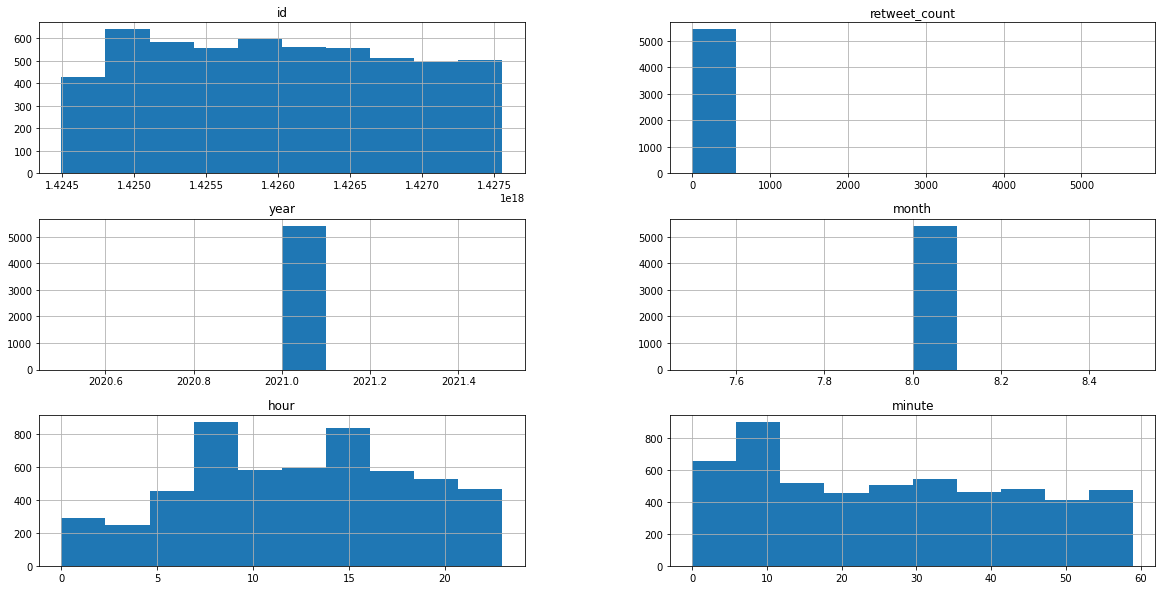

In [97]:
# plotting histograms to visualize patterns in the data

climate_df = climate_df.copy(deep=True)

# plotting histograms
climate_df.hist(figsize = (20,10))
plt.show()

The histograms seem to be unimodal.

In [98]:
climate_df.columns

Index(['id', 'tweet', 'location', 'created_at', 'retweet_count', 'class',
       'clean_text', 'date', 'year', 'month', 'hour', 'minute'],
      dtype='object')

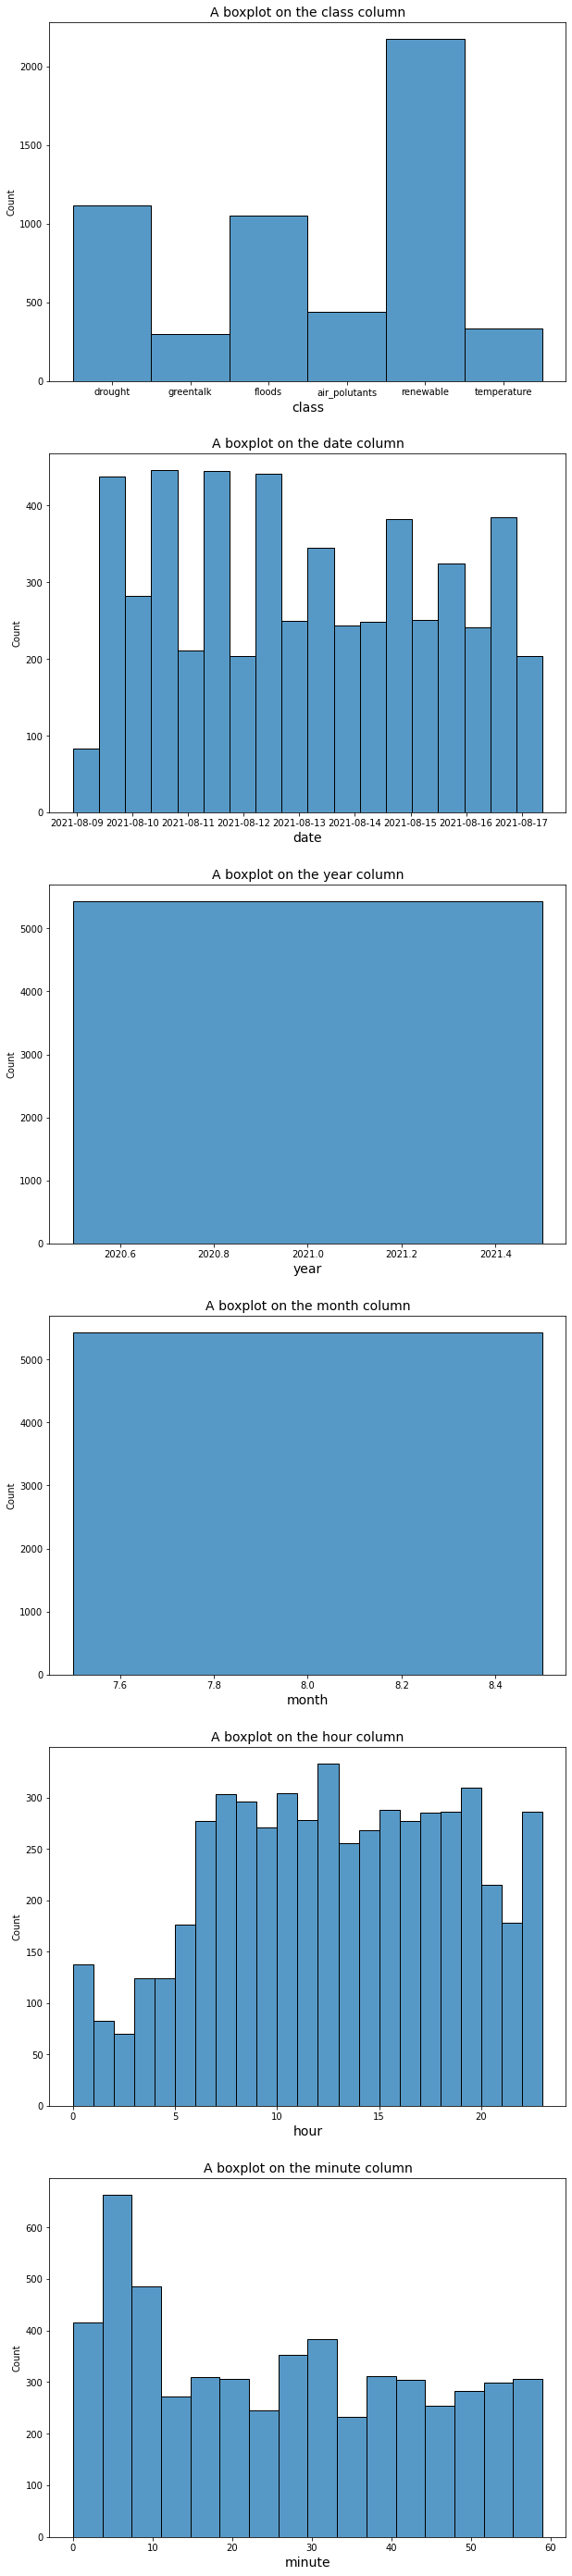

In [99]:
col_names = ['class', 'date', 'year', 'month', 'hour', 'minute']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = climate_df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

In [100]:
%%capture
!pip install -U dataprep==0.3.0a0
!pip install pycountry
from dataprep.clean import validate_country
import warnings
warnings.filterwarnings('ignore')

# Cleaning country names

climate_df = climate_df[validate_country(climate_df["location"])]


Text(0, 0.5, 'tweets')

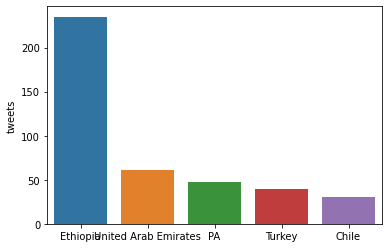

In [101]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our
x= climate_df.location.value_counts(ascending=False).iloc[:5]
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

drought          322
renewable        261
floods           164
air_polutants     53
temperature       45
greentalk         43
Name: class, dtype: int64


Text(0, 0.5, 'class size')

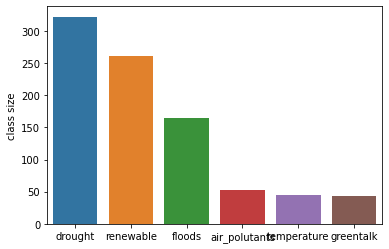

In [102]:
#check the class distriburion
import seaborn as sns
import matplotlib.pyplot as plt
print(climate_df['class'].value_counts())
x=climate_df['class'].value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('class size')

There was alot of class imbalance in our dataset.

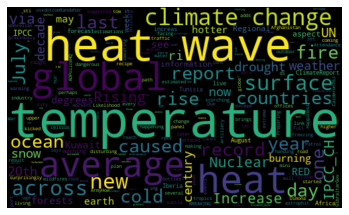

In [103]:
#plotting the wordcount
from wordcloud import WordCloud 
temperature = climate_df[climate_df['class'] == 'temperature' ]
allWords= ''.join( [twts for twts in temperature['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=200, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

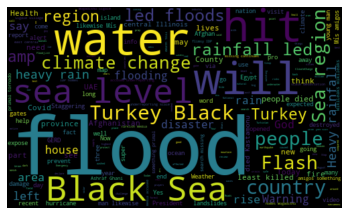

In [104]:
#plotting the wordcount
from wordcloud import WordCloud 
floods = climate_df[climate_df['class'] == 'floods' ]
allWords= ''.join( [twts for twts in floods['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

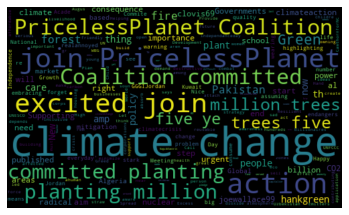

In [105]:
#plotting the wordcount
from wordcloud import WordCloud 
greentalk = climate_df[climate_df['class'] == 'greentalk' ]
allWords= ''.join( [twts for twts in greentalk['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

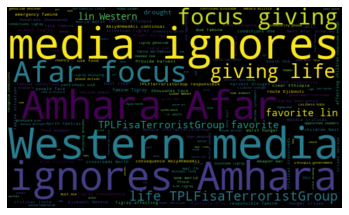

In [106]:
#plotting the wordcount
from wordcloud import WordCloud 
drought = climate_df[climate_df['class'] == 'drought' ]
allWords= ''.join( [twts for twts in drought['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

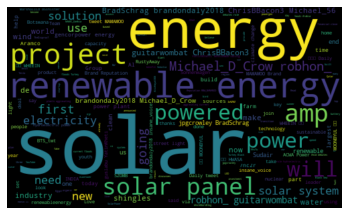

In [107]:
#plotting the wordcount
from wordcloud import WordCloud 
renewable = climate_df[climate_df['class'] == 'renewable' ]
allWords= ''.join( [twts for twts in renewable['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

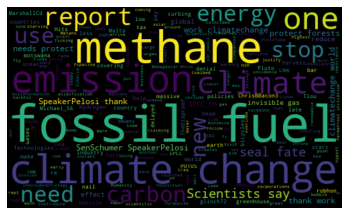

In [108]:
#plotting the wordcount
from wordcloud import WordCloud 
air_polutants = climate_df[climate_df['class'] == 'air_polutants' ]
allWords= ''.join( [twts for twts in air_polutants['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [109]:
climate_df.columns

Index(['id', 'tweet', 'location', 'created_at', 'retweet_count', 'class',
       'clean_text', 'date', 'year', 'month', 'hour', 'minute'],
      dtype='object')

#Label encoding for easier visualizations

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# converting type of columns to 'category'
climate_df['class'] = climate_df['class'].astype('category')

# creating instance of labelencoder
labelencoder = LabelEncoder()
climate_df['encoded_class'] = labelencoder.fit_transform(climate_df['class'])
climate_df

,id,tweet,location,created_at,retweet_count,class,clean_text,date,year,month,hour,minute,encoded_class
1,1427540945260720136,We are excited to join the #PricelessPlanet Co...,United Arab Emirates,2021-08-17 08:00:58,0,greentalk,We are excited to join the #PricelessPlanet Co...,2021-08-17 08:00:58,2021,8,8,0,3
6,1427520052895657991,Climate change endangers quality of life in Ku...,Kuwait,2021-08-17 06:37:57,3,greentalk,Climate change endangers quality of life in Ku...,2021-08-17 06:37:57,2021,8,6,37,3
21,1427312698719543321,Berebeyu is a small village in Amhara’s highla...,Ethiopia,2021-08-16 16:54:00,0,drought,Berebeyu is a small village in Amhara’s highla...,2021-08-16 16:54:00,2021,8,16,54,1
25,1427295585887948804,Tell the students/professional in the field of...,Haiti,2021-08-16 15:46:00,1,floods,Tell the students/professional in the field of...,2021-08-16 15:46:00,2021,8,15,46,2
35,1427205854747631618,We are excited to join the #PricelessPlanet Co...,United Arab Emirates,2021-08-16 09:49:26,0,greentalk,We are excited to join the #PricelessPlanet Co...,2021-08-16 09:49:26,2021,8,9,49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,1424673188550565894,"""Hundreds of thousands face famine conditions ...",Ethiopia,2021-08-09 10:05:31,0,drought,"""Hundreds of thousands face famine conditions ...",2021-08-09 10:05:31,2021,8,10,5,1
5598,1424665103002128387,"""UN says food aid in Ethiopia's war-torn Tigra...",Ethiopia,2021-08-09 09:33:24,1,drought,"""UN says food aid in Ethiopia's war-torn Tigra...",2021-08-09 09:33:24,2021,8,9,33,1
5599,1424662585547403268,"""Hundreds of thousands face famine conditions ...",Ethiopia,2021-08-09 09:23:24,1,drought,"""Hundreds of thousands face famine conditions ...",2021-08-09 09:23:24,2021,8,9,23,1
5602,1424641205820817410,@MHHBJA2005 @GlasgowBhoy @Seebtree2 @IsraelMFA...,Islamic Republic of Iran,2021-08-09 07:58:26,0,drought,@MHHBJA2005 @GlasgowBhoy @Seebtree2 @IsraelMFA...,2021-08-09 07:58:26,2021,8,7,58,1


####Visualization of popularity of the tweets according to the hour they were tweeted

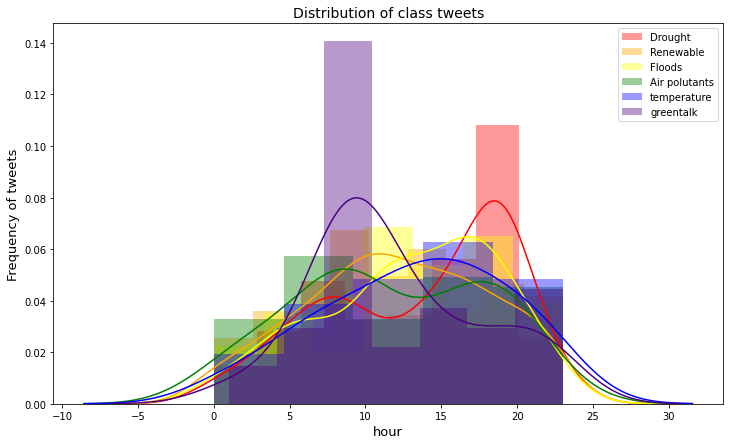

In [111]:

# Plotting histogram to show distribution of survival as compared to age
# 

one = climate_df.loc[climate_df['class']=='drought', 'hour']    # Selecting only negative datapoints in the age column
two = climate_df.loc[climate_df['class']=='renewable', 'hour']    # Selecting only negative datapoints in the age column
three = climate_df.loc[climate_df['class']=='floods', 'hour']    # Selecting only negative datapoints in the age column
four = climate_df.loc[climate_df['class']=='air_polutants', 'hour']    # Selecting only negative datapoints in the age column
five = climate_df.loc[climate_df['class']=='temperature', 'hour']    # Selecting only negative datapoints in the age column
six = climate_df.loc[climate_df['class']=='greentalk', 'hour']    # Selecting only negative datapoints in the age column




# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="Drought")
sns.distplot(two, color="orange", label="Renewable")
sns.distplot(three, color="yellow", label="Floods")
sns.distplot(four, color="green", label="Air polutants")
sns.distplot(five, color="blue", label="temperature")
sns.distplot(six, color="indigo", label="greentalk")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

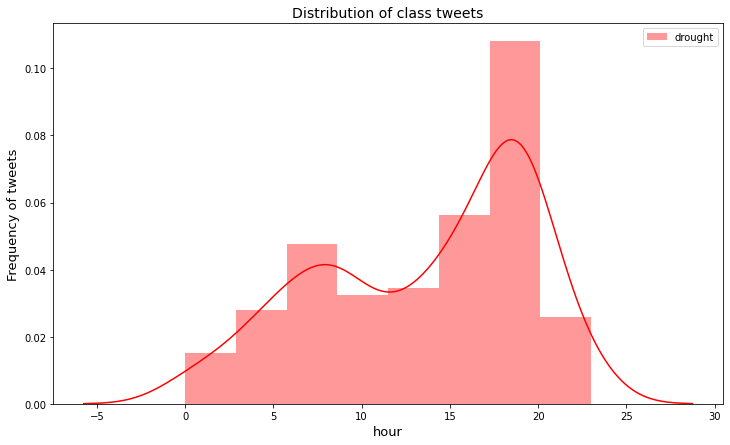

In [112]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="drought")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

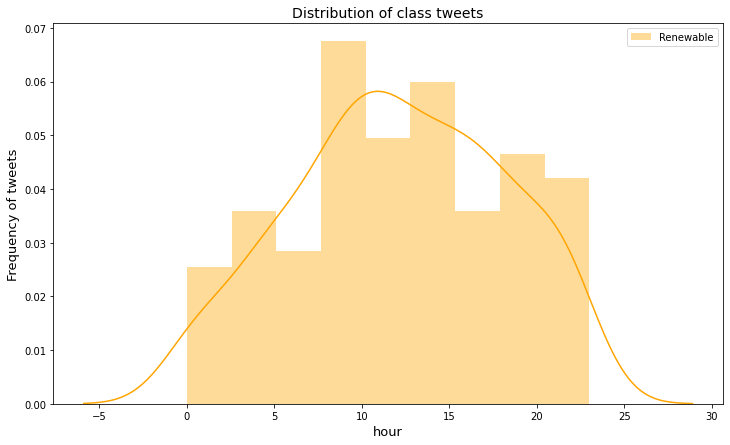

In [113]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(two, color="orange", label="Renewable")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

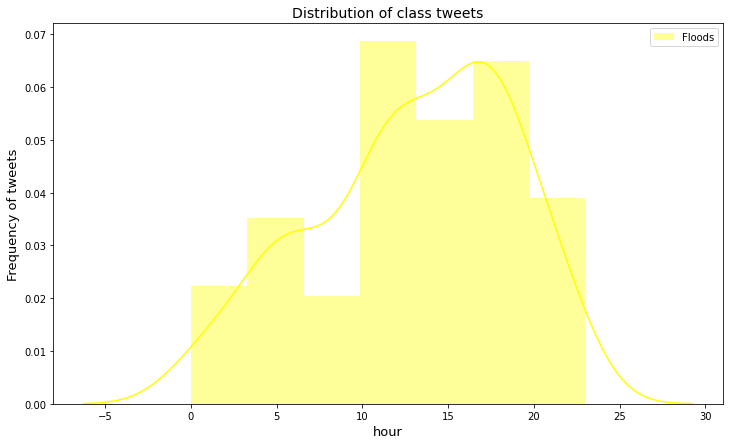

In [114]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(three, color="yellow", label="Floods")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

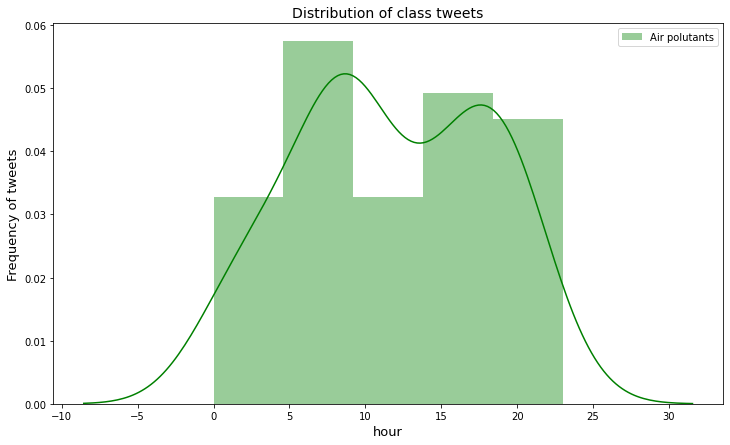

In [115]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(four, color="green", label="Air polutants")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

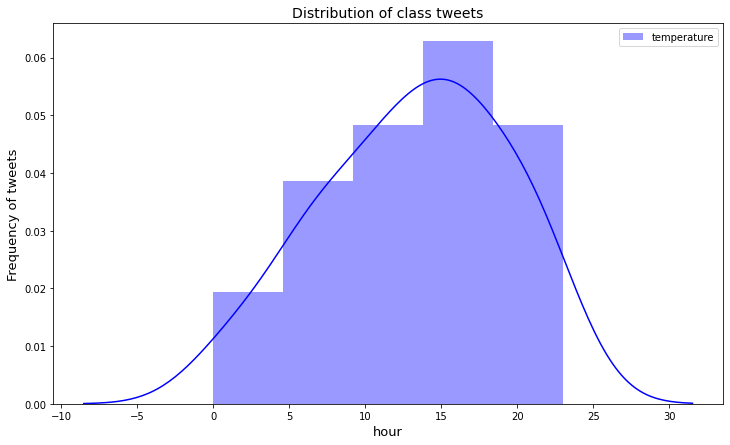

In [116]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(five, color="blue", label="temperature")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

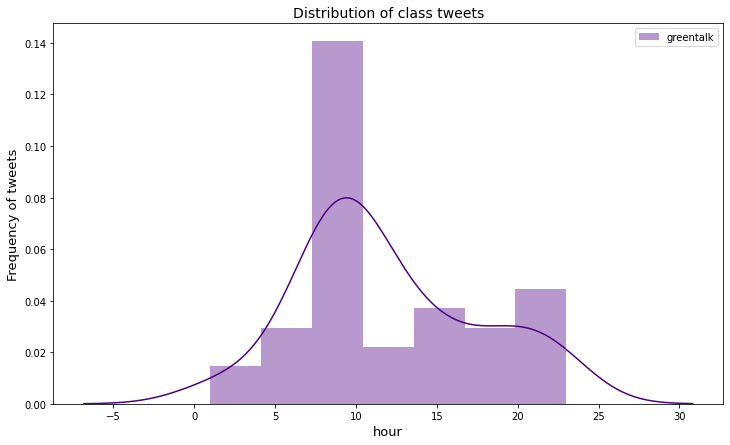

In [117]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(six, color="indigo", label="greentalk")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

####Visualization of popularity of the tweets according to the retweet count

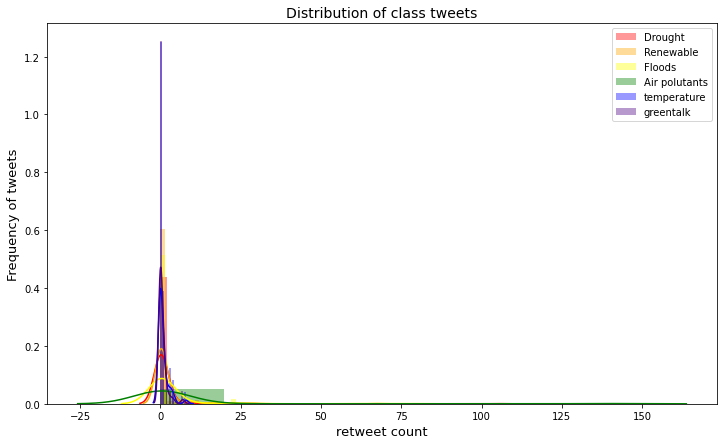

In [118]:

# Plotting histogram to show distribution of survival as compared to age
# 

one = climate_df.loc[climate_df['class']=='drought', 'retweet_count']    # Selecting only negative datapoints in the age column
two = climate_df.loc[climate_df['class']=='renewable', 'retweet_count']    # Selecting only negative datapoints in the age column
three = climate_df.loc[climate_df['class']=='floods', 'retweet_count']    # Selecting only negative datapoints in the age column
four = climate_df.loc[climate_df['class']=='air_polutants', 'retweet_count']    # Selecting only negative datapoints in the age column
five = climate_df.loc[climate_df['class']=='temperature', 'retweet_count']    # Selecting only negative datapoints in the age column
six = climate_df.loc[climate_df['class']=='greentalk', 'retweet_count']    # Selecting only negative datapoints in the age column




# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="Drought")
sns.distplot(two, color="orange", label="Renewable")
sns.distplot(three, color="yellow", label="Floods")
sns.distplot(four, color="green", label="Air polutants")
sns.distplot(five, color="blue", label="temperature")
sns.distplot(six, color="indigo", label="greentalk")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

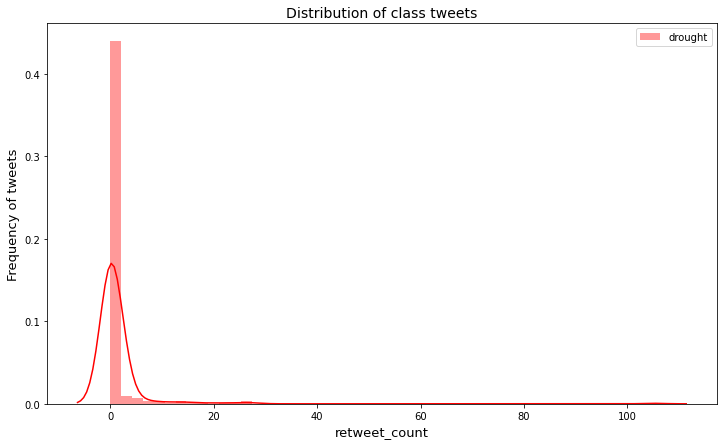

In [119]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="drought")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

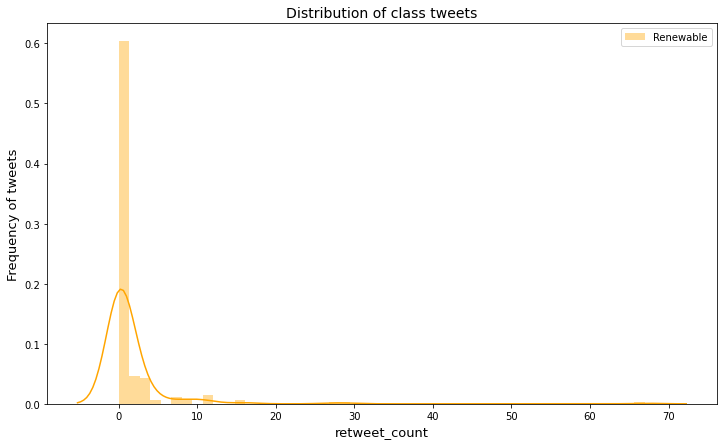

In [120]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(two, color="orange", label="Renewable")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

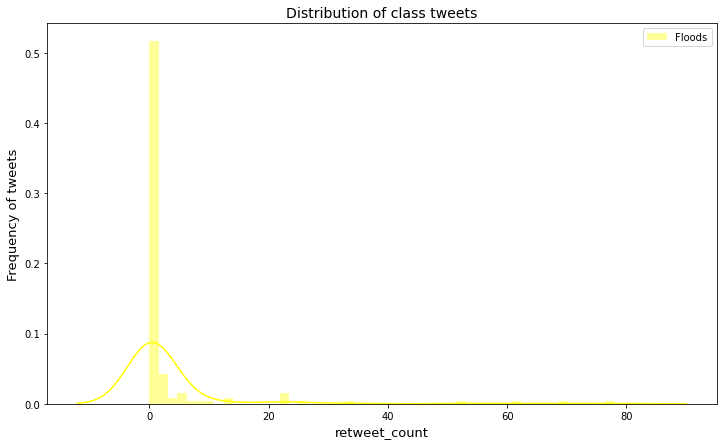

In [121]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(three, color="yellow", label="Floods")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

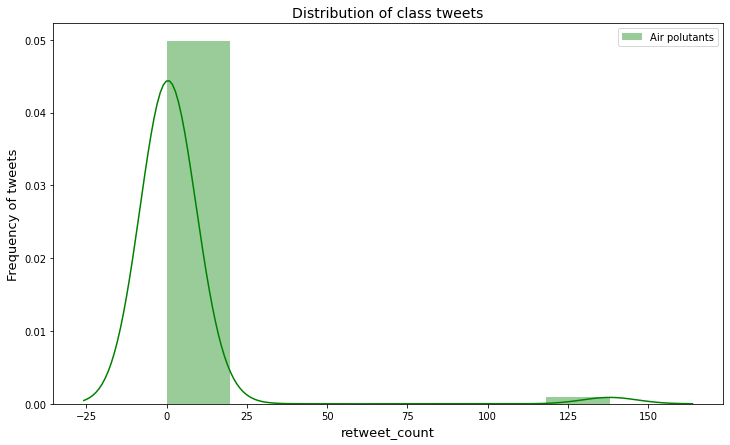

In [122]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(four, color="green", label="Air polutants")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

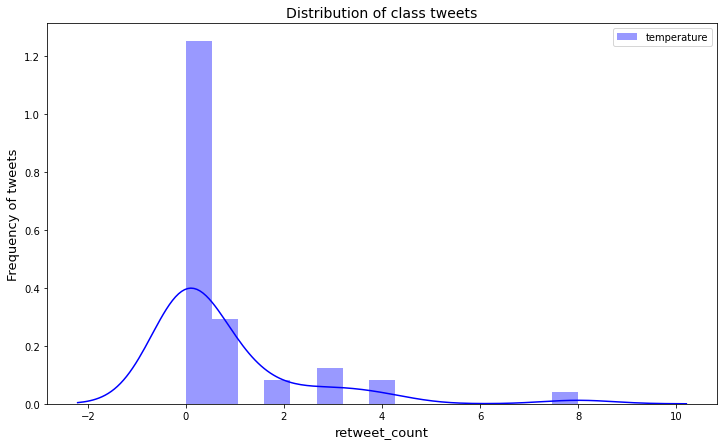

In [123]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(five, color="blue", label="temperature")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

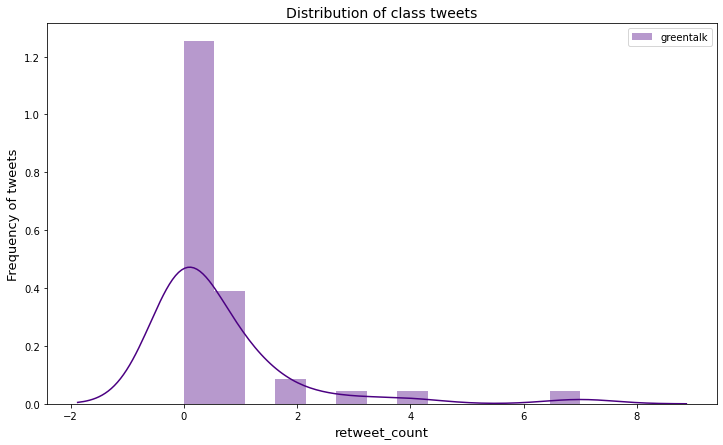

In [124]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(six, color="indigo", label="greentalk")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('retweet_count', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()